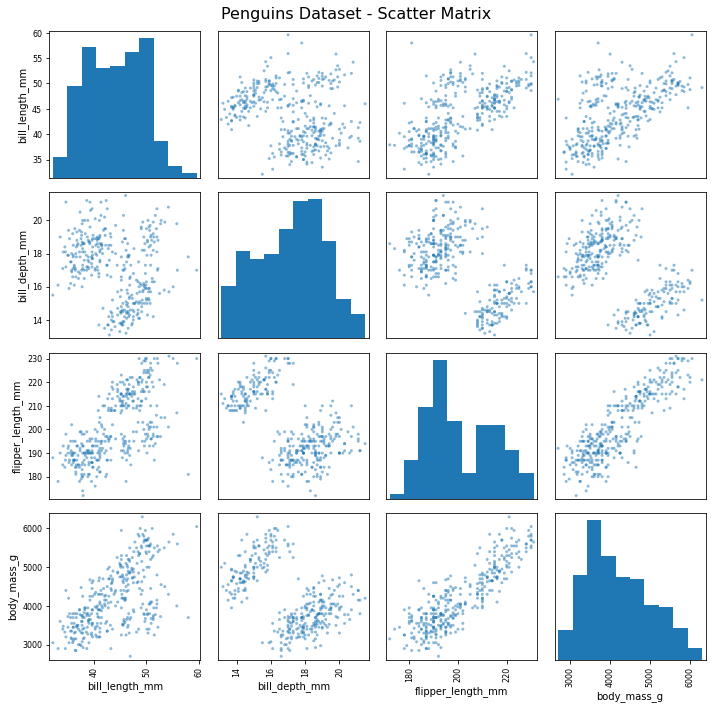

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Penquinデータセットをロード
penguins = sns.load_dataset('penguins')

# 散布図行列を作成
scatter_matrix = pd.plotting.scatter_matrix(penguins, figsize=(10, 10))

# グラフのタイトルを追加
plt.suptitle("Penguins Dataset - Scatter Matrix", fontsize=16)

# グラフのラベルが重ならないように調整
plt.tight_layout()

# 図を保存
plt.savefig('scatter_matrix.png')

# 散布図行列を表示
plt.show()


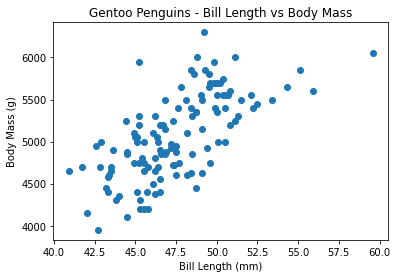

In [4]:
# ジェンツーペンギンのデータを抽出
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']

# くちばしの長さと体重のデータを抽出
bill_length = gentoo_penguins['bill_length_mm']
body_mass = gentoo_penguins['body_mass_g']

# 散布図をプロット
plt.scatter(bill_length, body_mass)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins - Bill Length vs Body Mass')

# 図を保存
plt.savefig('scatter_gentoo.png')

# グラフを表示
plt.show()